STEP 1.1 : IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

STEP 1.2 : LOAD DATASET

In [4]:
df = pd.read_csv("C:/Users/shiva/Downloads/Loan_default.csv.csv")
df.head()

,loanid,age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


STEP 1.3 : BASIC DATA INSPECTION

In [5]:
df.shape

(255347, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loanid          255347 non-null  object 
 1   age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
df.columns

Index(['loanid', 'age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

STEP 2 : EXPLORATORY DATA ANALYSIS

STEP 2.1 : CHECK TARGET VARIABLE DISTRIBUTION

In [8]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

STEP 2.2 : VISUALIZE DEFAULT VS NOT DEFAULT

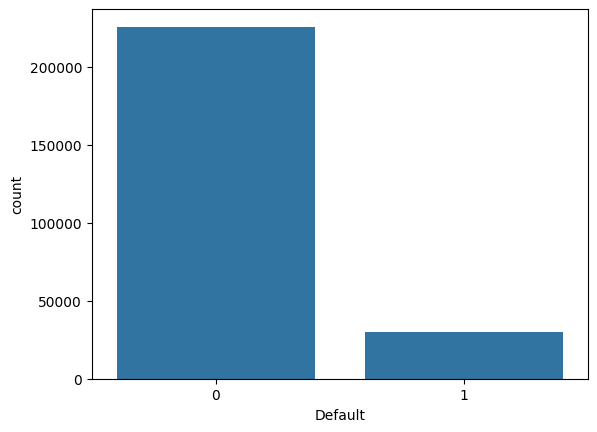

In [9]:
sns.countplot(x='Default', data=df)
plt.show()

STEP 2.3 : RELATIONSHIP BETWEEN CREDIT SCORE AND DEFAULT

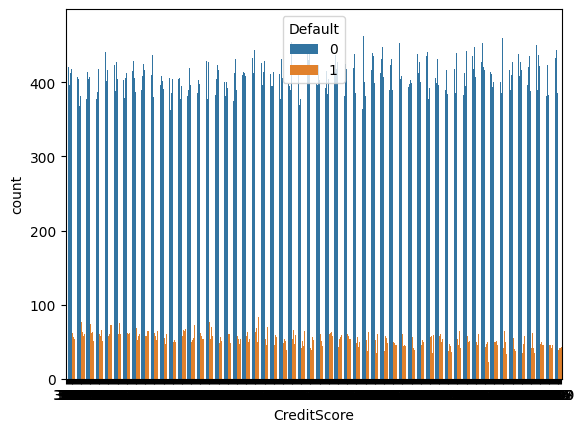

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/shiva/Downloads/Loan_default.csv.csv")
sns.countplot(x='CreditScore', hue='Default', data=df)
plt.show()

STEP 2.4 : INCOME VS DEFAULT

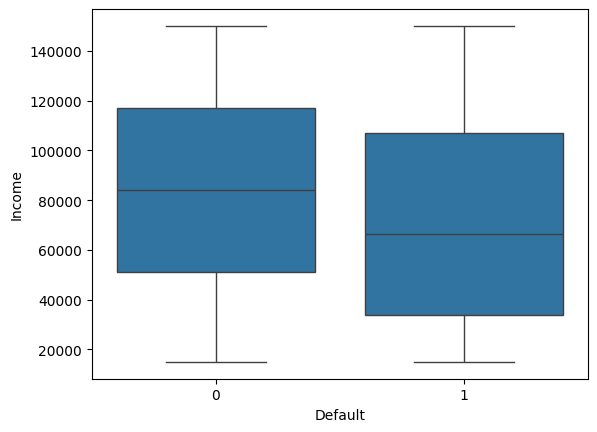

In [2]:
sns.boxplot(x='Default', y='Income', data=df)
plt.show()

STEP 2.5 : CORRELATION HEATMAP

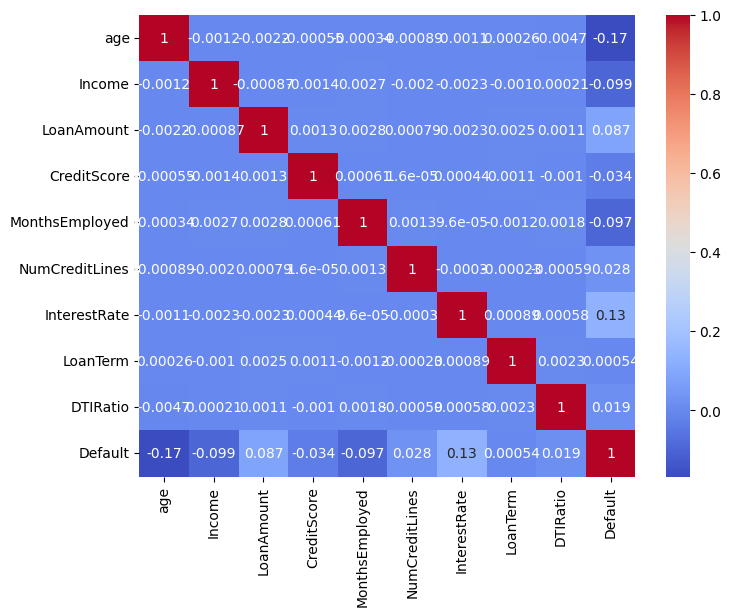

In [3]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm'
)
plt.show()

STEP 3 : DATA CLEANING AND HANDLING MISSING VALUES

STEP 3.1 : CHECK MISSING VALUES

In [4]:
import pandas as pd
df = pd.read_csv("C:/Users/shiva/Downloads/Loan_default.csv.csv")
df.isnull().sum()

loanid            0
age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

STEP 3.2 : SEPARATE CATEGORICAL AND NUMERICAL COLUMNS

In [5]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

STEP 3.3 : FILL MISSING VALUES

CATEGORICAL -> MODE

In [6]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

NUMERICAL -> MEDIAN

In [7]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

STEP 3.4 : VERIFY MISSING VALUES ARE GONE

In [8]:
df.isnull().sum()

loanid            0
age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

STEP 4 : FEATURE ENCODING

STEP 4.1 : IDENTIFY CATEGORICAL CLOUMNS

In [9]:
cat_cols

Index(['loanid', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

STEP 4.2 : ENCODE TARGET VARIABLE(DEFAULT)

In [10]:
df['Default'] = df['Default'].map({'Y':1, 'N':0})

STEP 4.3 : ENCODE INPUT CATEGORICAL FEATURES

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    if col != 'Default':
        df[col] = le.fit_transform(df[col])

STEP 4.4 : VERIFY ENCODING

In [14]:
df.head()
df.dtypes

loanid              int64
age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default           float64
dtype: object

STEP 5 : TRAIN-TEST SPLIT & CLASS IMBALANCE HANDLING

STEP 5.1 : SEPARATE FEATURES AND TARGET

In [14]:
X = df.drop('Default',axis=1)
y = df['Default']

STEP 5.2 : TRAIN-TEST SPLIT (STRATIFIED)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y

)

why stratify=y?
keeps same class ratio in train & test and prevents biased evaluation

check class distribution

In [16]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Default
0    0.883865
1    0.116135
Name: proportion, dtype: float64

STEP 5.3 : HANDLE CLASS IMBALANCE USING SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

what smote does?
-> creates synthetic minority samples
-> Does not duplicate data
-> prevents model bias

verify balance after SMOTE

In [18]:
y_train_resampled.value_counts()

Default
0    180555
1    180555
Name: count, dtype: int64

STEP 6: MODEL TRAINING

STEP 6.1 : LOGISTIC REGRESSION


In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

c:\Users\shiva\OneDrive\Desktop\credit-risk-platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

STEP 6.2: RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

STEP 7: MODEL EVALUATION

STEP 7.1: MAKE PREDICTIONS

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_log = log_model.predict(X_test)

y_pred_rf = rf_model.predict(X_test)

STEP 7.2: CONFUSION MATRIX

In [23]:
print("Logistic Regression Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_log))

print("\nRandom Forest Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression Confusion Matrix: 
[[30887 14252]
 [ 2064  3867]]

Random Forest Confusion Matrix: 
[[41071  4068]
 [ 4594  1337]]


STEP 7.3: CLASSIFICATION REPORT

In [24]:
print("Logistic Regression Report: ")
print(classification_report(y_test, y_pred_log))

print("Random Forest Report: ")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Report: 
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.21      0.65      0.32      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.67      0.56     51070
weighted avg       0.85      0.68      0.74     51070

Random Forest Report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     45139
           1       0.25      0.23      0.24      5931

    accuracy                           0.83     51070
   macro avg       0.57      0.57      0.57     51070
weighted avg       0.82      0.83      0.83     51070



STEP 8: FEATURE IMPORTANCE & BUSINESS INTERPRETATION

STEP 8.1: EXTRACT FEATURE IMPORTANCE

In [25]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
1,age,0.111224
8,LoanTerm,0.099499
7,InterestRate,0.092355
2,Income,0.072819
5,MonthsEmployed,0.069425
3,LoanAmount,0.063077
16,HasCoSigner,0.057637
4,CreditScore,0.057333
9,DTIRatio,0.056818
14,HasDependents,0.055097


STEP 8.2: VISUALIZE FEATURE IMPORTANCE

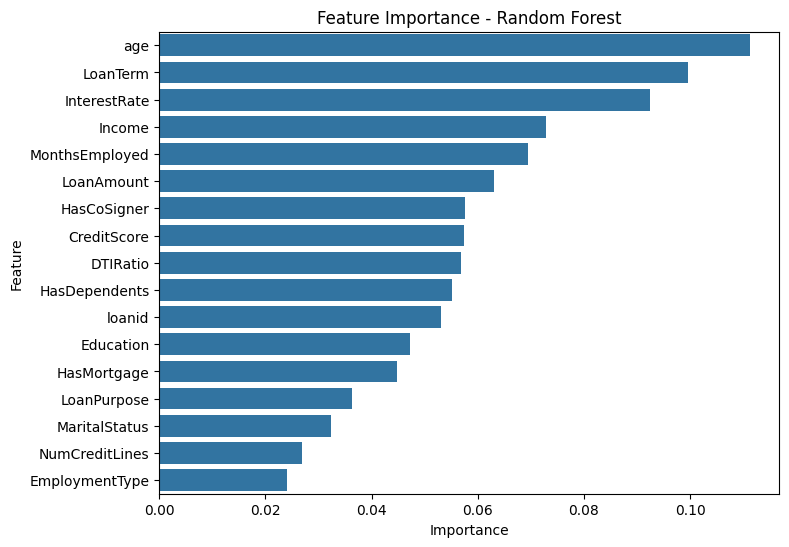

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()

STEP 9: MODEL DEPLOYMENT USING STREAMLIT

STEP 9.1: SAVE THE TRAINED MODEL

In [28]:
import joblib
joblib.dump(rf_model, "loan_model.pkl")
joblib.dump(X.columns, "model_features.pkl")

['model_features.pkl']